In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mltools as ml

# **1.1**

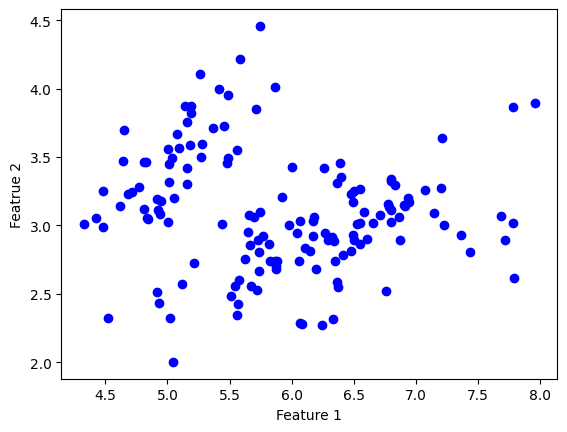

In [2]:
X = np.loadtxt("/content/data/iris.txt")[:, :2]

plt.figure()
plt.scatter(X[:, 0], X[:, -1], c='b')
plt.xlabel("Feature 1")
plt.ylabel("Featrue 2")
plt.show()

I think there are two clusters. One in the upper left region and one in the lower right region

# **1.2**

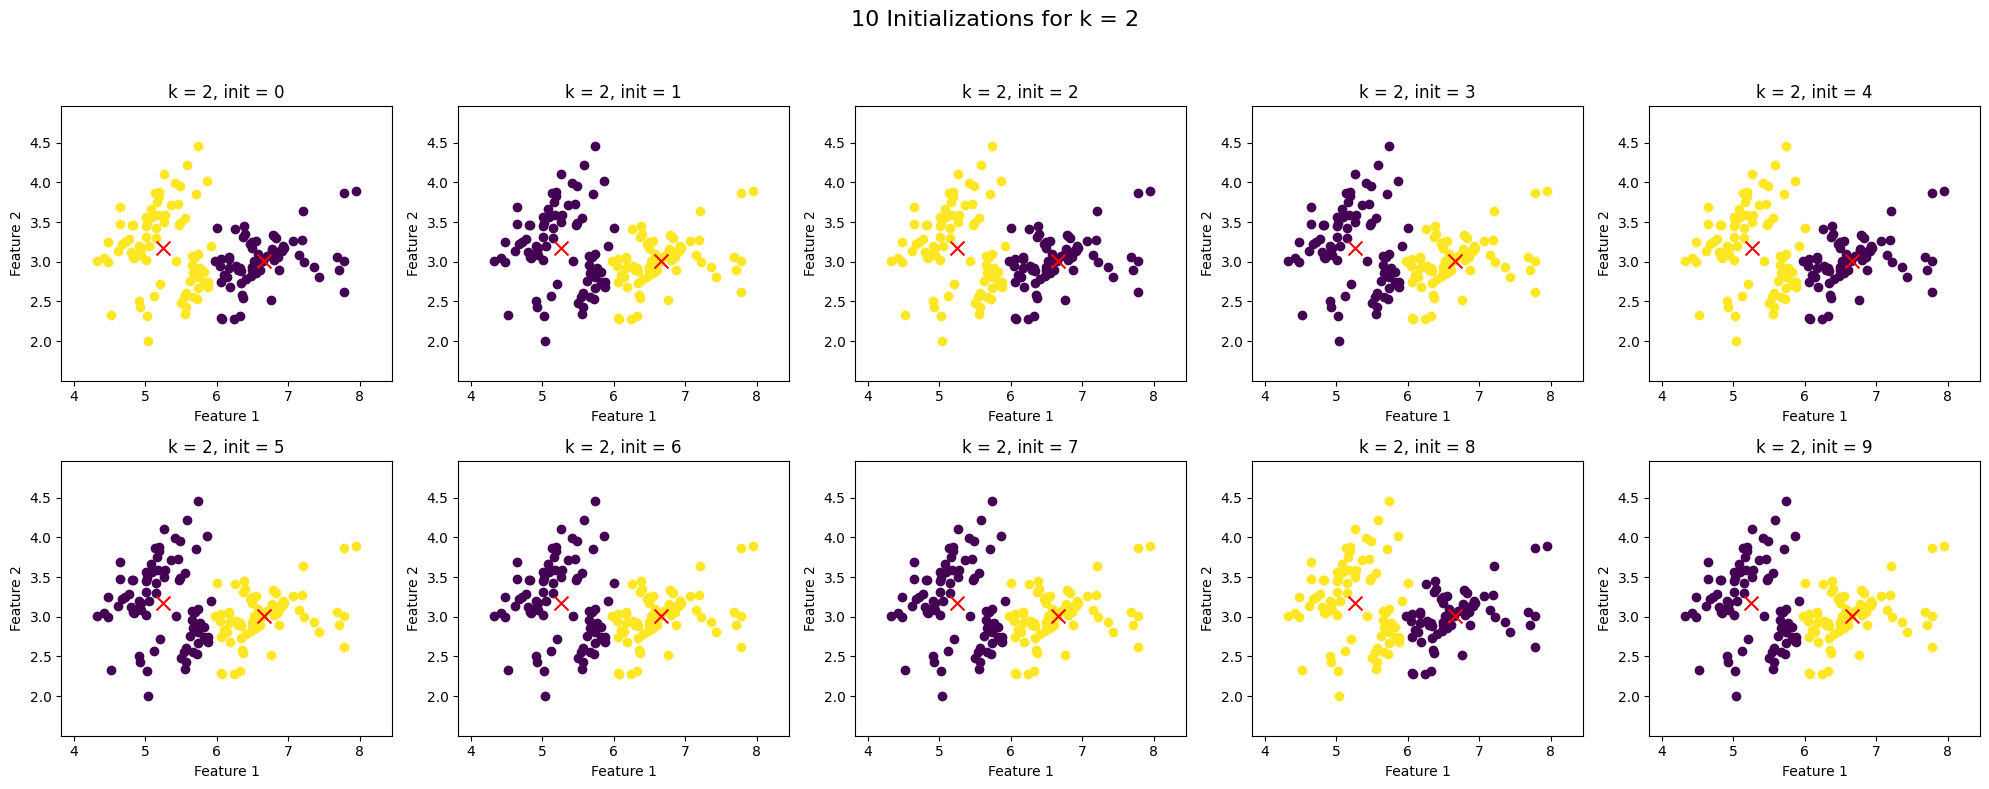

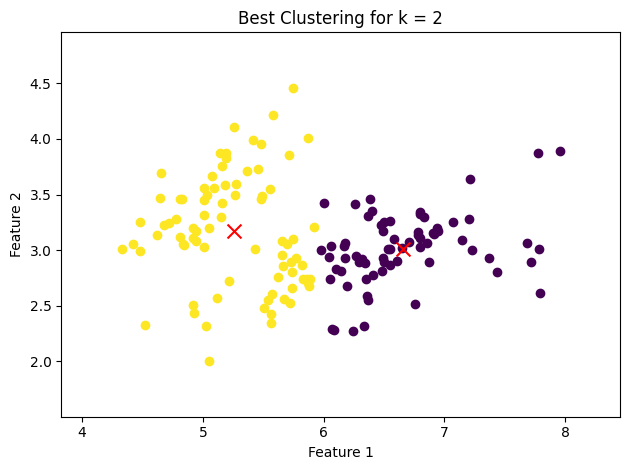

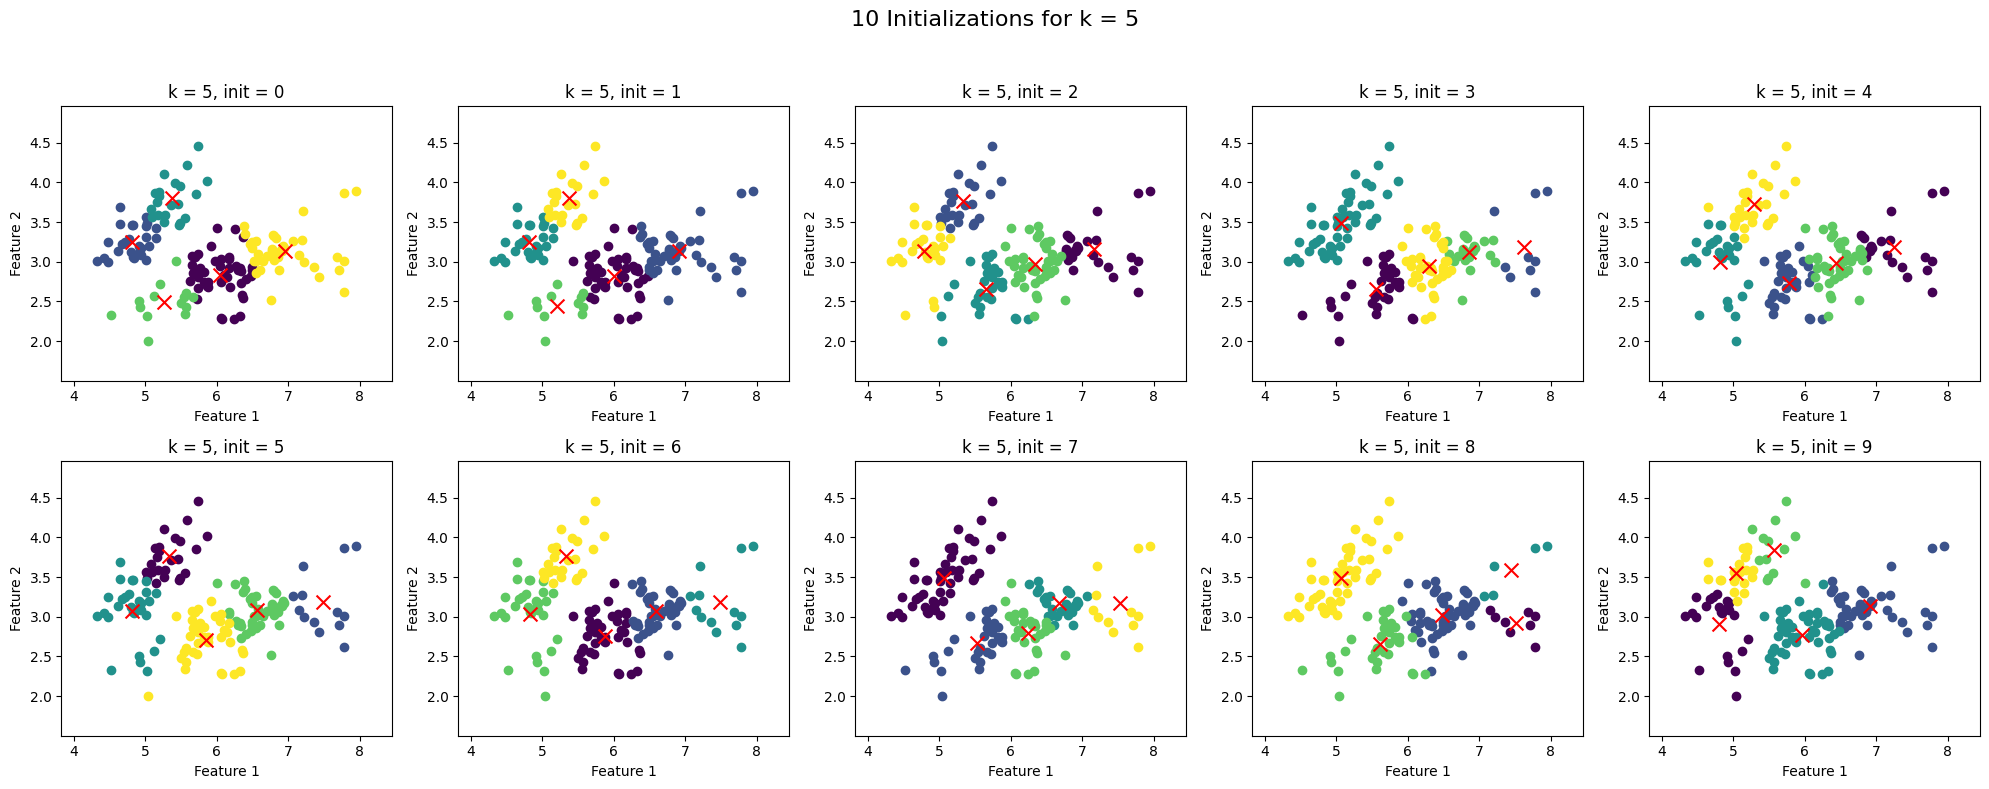

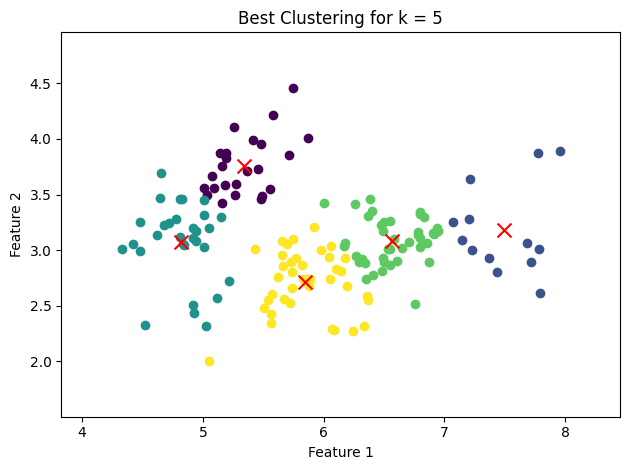

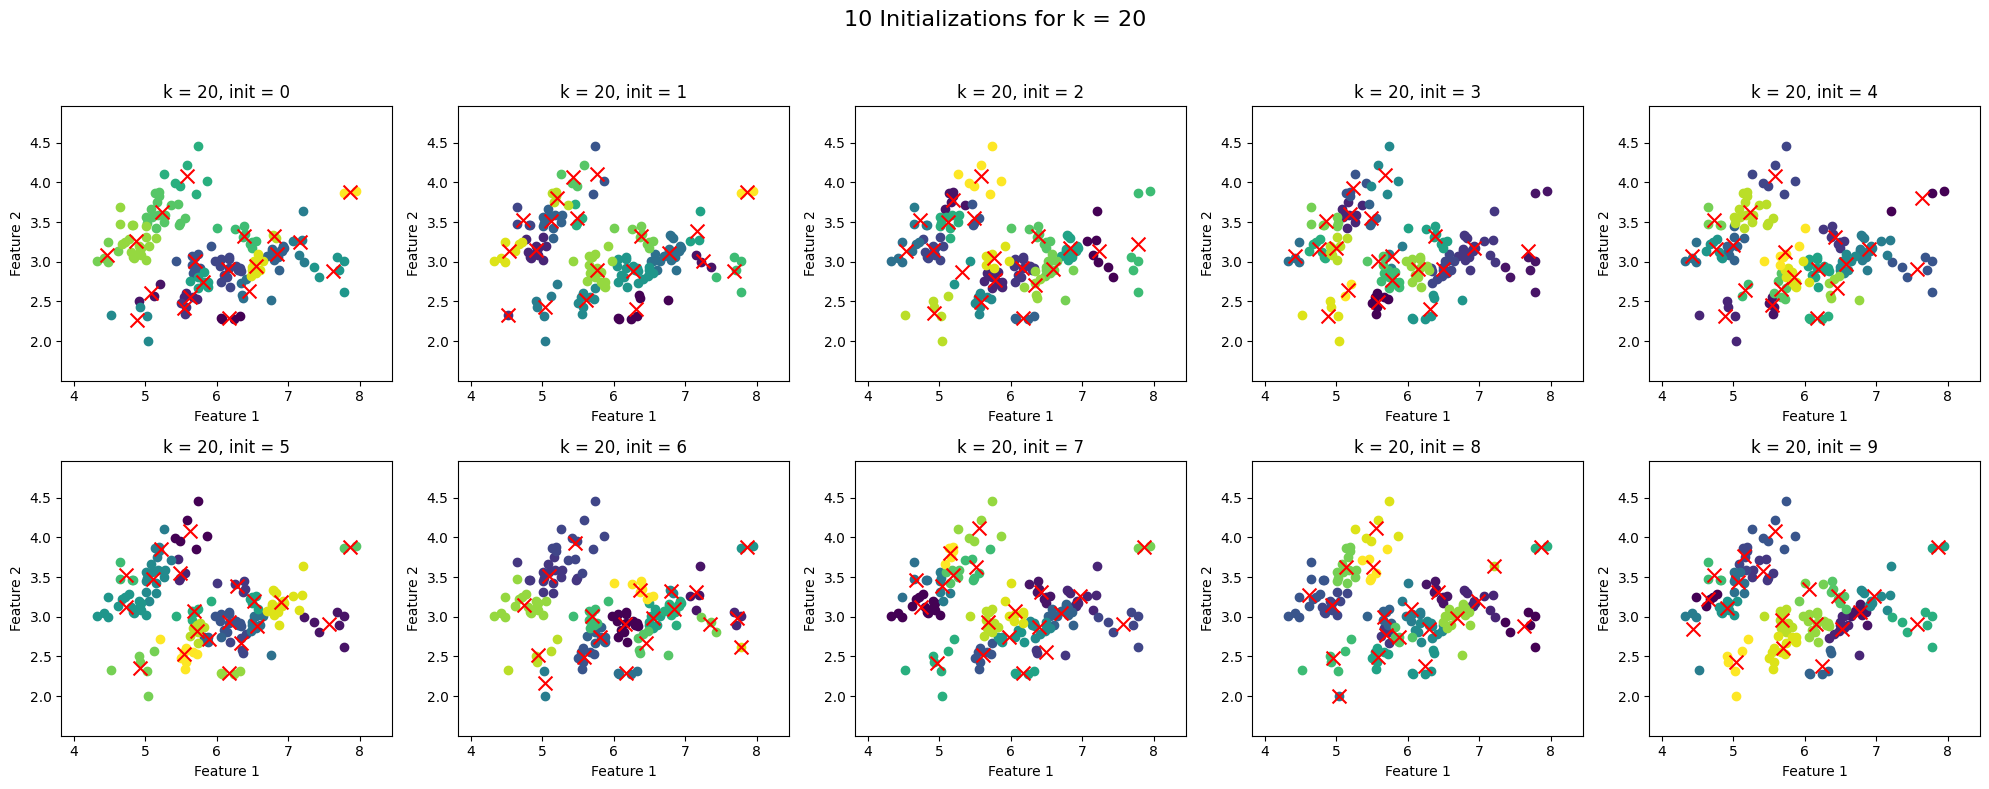

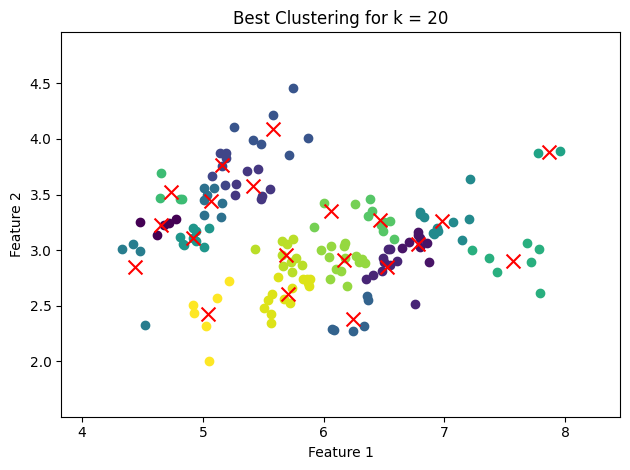

In [9]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="color is redundantly defined")

ks = [2, 5, 20]
best_assign = {}
best_centers = {}

for k in ks:
  fig, axes = plt.subplots(2, 5, figsize=(20, 8))
  axes = axes.flatten()
  best_inertia = np.inf
  best_kmeans = None
  # 10 different initialize
  # plt.figure()
  for i in range(10):
    kmeans = KMeans(n_clusters=k, n_init=1, init='random', random_state=i)
    kmeans.fit(X)
    # all_centers[k][i] = kmeans.cluster_centers_
    if kmeans.inertia_ < best_inertia:
      best_inertia = kmeans.inertia_
      best_kmeans = kmeans

    # Plot the clustering result on the i-th subplot
    ax = axes[i]
    ml.plotClassify2D(None, X, kmeans.labels_, axis=ax)
    ax.set_xlim(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5)
    ax.set_ylim(np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5)
    # Plot cluster centers
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', zorder=10)
    ax.set_title(f"k = {k}, init = {i}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

  best_assign[k] = best_kmeans.labels_
  best_centers[k] = best_kmeans.cluster_centers_

  fig.suptitle(f"10 Initializations for k = {k}", fontsize=16)
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

  fig2, ax2 = plt.subplots()
  ml.plotClassify2D(None, X, best_assign[k], axis=ax2)
  ax2.set_xlim(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5)
  ax2.set_ylim(np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5)
  ax2.scatter(best_centers[k][:, 0], best_centers[k][:, 1],
              marker='x', s=100, c='red', zorder=10)
  ax2.set_title(f"Best Clustering for k = {k}")
  ax2.set_xlabel("Feature 1")
  ax2.set_ylabel("Feature 2")
  plt.tight_layout()
  plt.show()

We can see that different initialization results in different solution.

# **1.3**

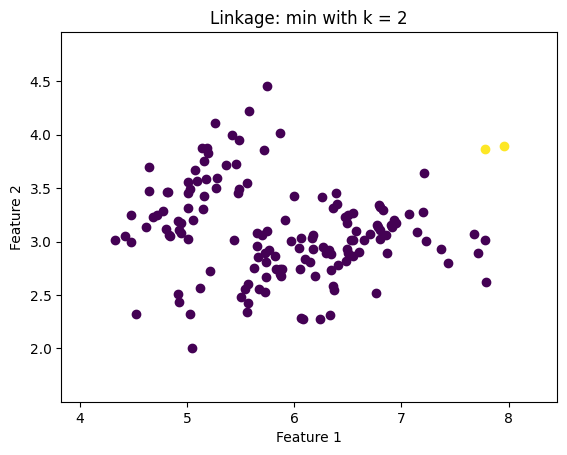

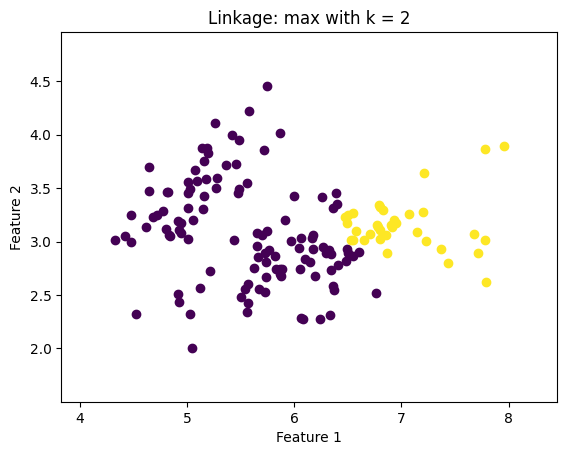

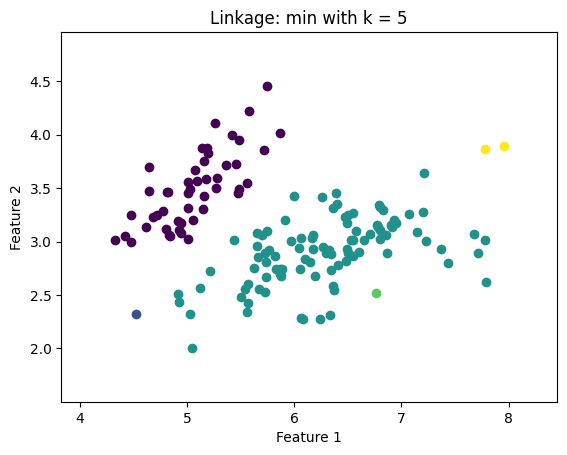

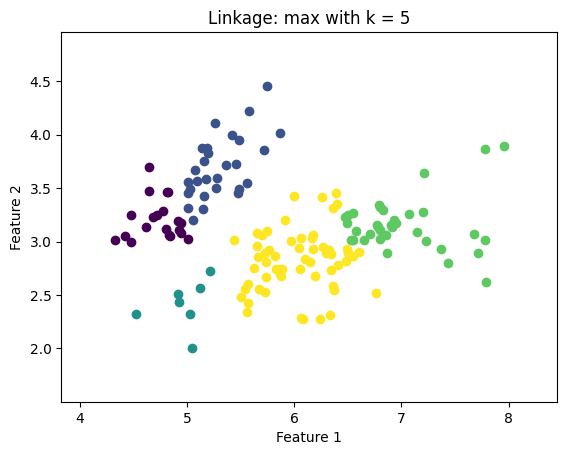

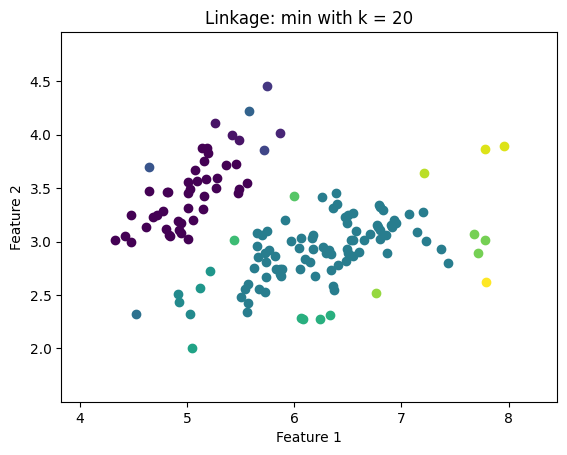

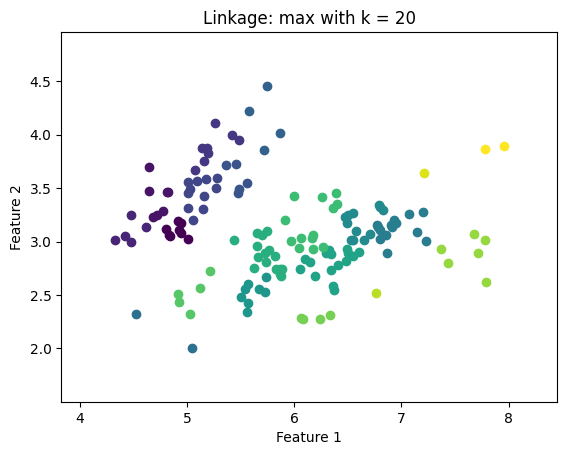

In [20]:
linkages = {"min", "max"}
ks = [2, 5, 20]

for k in ks:
  for linkage in linkages:
    clusters, join = ml.cluster.agglomerative(X, K=k, method=linkage)

    plt.figure()
    ml.plotClassify2D(None, X, clusters)
    plt.xlim(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5)
    plt.ylim(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5)
    plt.title(f"Linkage: {linkage} with k = {k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Single linkage: uses the minimum distance between clusters, which may produce chain-like, elongated clusters.


Complete linkage: uses the maximum distance, leading to more compact and uniform clusters.

# **1.4**

In **k-means** clustering, clusters are formed as compact, block-like groups that tend to be similar in size.

In contrast, agglomerative clustering with **single linkage** tends to merge many nearby points into a single cluster, sometimes leaving only a few outlying points in separate clusters. This can result in one large cluster with a few very small ones.

On the other hand, **complete linkage** produces clusters that are more similar to those from k-means, as it prevents extreme groupings and yields more balanced, compact clusters.

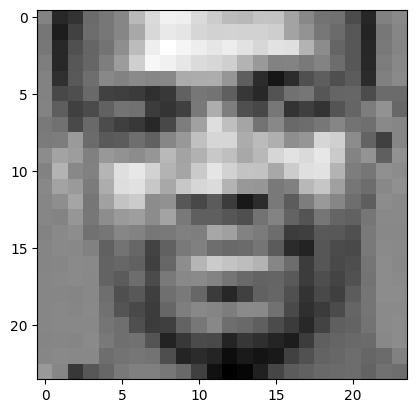

In [23]:
X_face = np.genfromtxt("/content/data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

# **2.1**

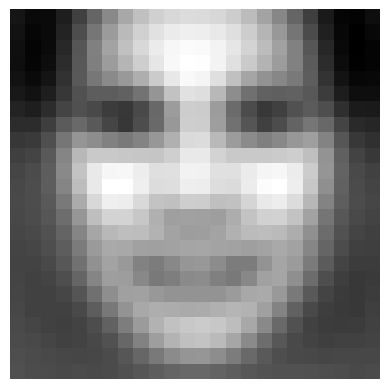

In [25]:
mu = np.mean(X_face, axis=0)
X0 = X_face - mu

mean_face = np.reshape(mu, (24, 24))

plt.figure()
plt.imshow(mean_face.T, cmap="gray")
plt.axis("off")
plt.show()

This is kinda scary:(

# **2.2**

In [26]:
import scipy.linalg as sl

U, S, V = sl.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))

print("Shape of W: ", W.shape)
print("Shape of V: ", V.shape)

Shape of W:  (4916, 576)
Shape of V:  (576, 576)


# **2.3**

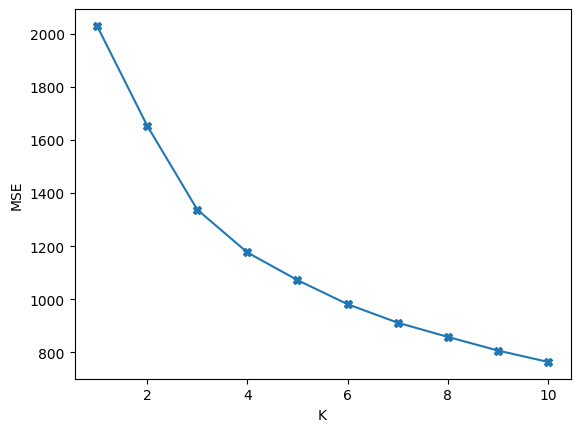

In [28]:
mse = []
ks = range(1, 11)

for k in ks:
  Xhat = W[:, :k].dot(V[:k, :])
  curr_mse = np.mean((X0 - Xhat) ** 2)
  mse.append(curr_mse)

plt.figure()
plt.plot(ks, mse, marker='X')
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

# **2.4**

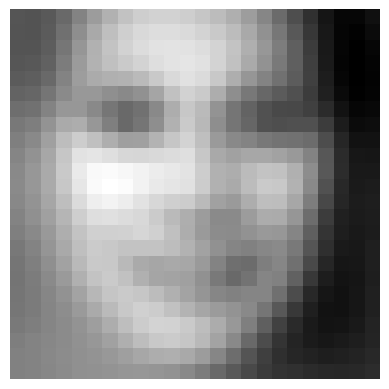

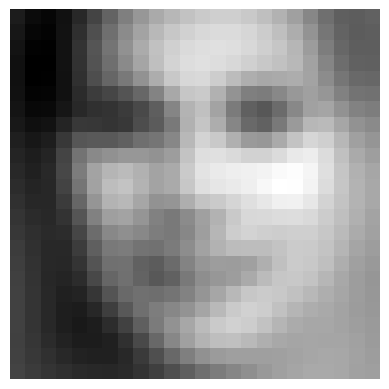

In [30]:
for j in range(3):
  alpha = 2 * np.median(np.abs(W[:, j]))

  data1 = mu + alpha * V[j, :]
  data2 = mu - alpha * V[j, :]

plt.figure()
plt.imshow(np.reshape(data1, (24, 24)).T, cmap="gray")
plt.axis("off")

plt.figure()
plt.imshow(np.reshape(data2, (24, 24)).T, cmap="gray")
plt.axis("off")

plt.show()

# **2.5**

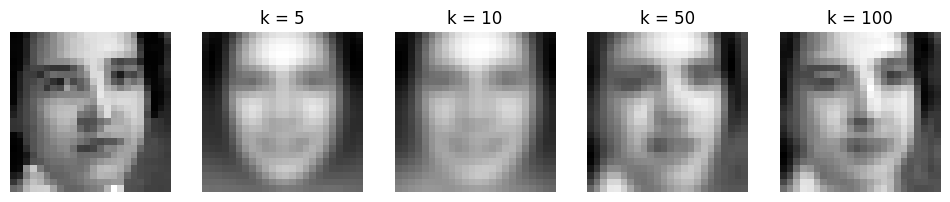

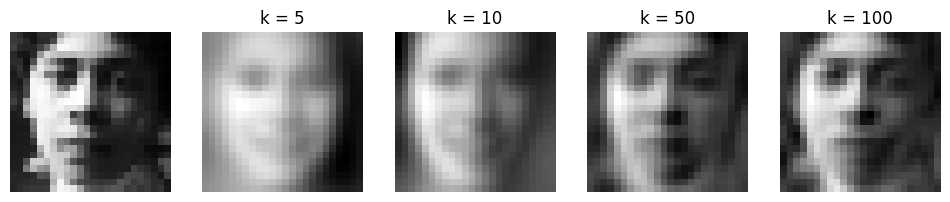

In [42]:
face_index = [2, 4]
re_k = [5, 10, 50, 100]

for idx in face_index:
  original = X_face[idx, :]
  plt.figure(figsize=(12, 3))

  plt.subplot(1, len(re_k) + 1, 1)
  plt.imshow(np.reshape(original, (24, 24)).T , cmap="gray")
  plt.axis("off")

  for i, k in enumerate(re_k):
    coeffs = W[idx, :k]
    recon = mu + coeffs.dot(V[:k, :])

    plt.subplot(1, len(re_k) + 1, i + 2)
    plt.imshow(np.reshape(recon, (24, 24)).T, cmap="gray")
    plt.title(f"k = {k}")
    plt.axis("off")

plt.show()

Higher k: the reconstruction captures more individual details

Lower k: produces an image closer to the overall dataset average.

# **2.6**

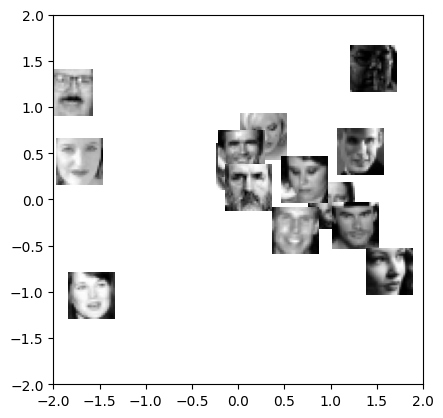

In [53]:
import mltools.transforms

idx = np.random.choice(X_face.shape[0], size=15, replace=False)
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
# plt.figure(); plt.hold(True); # you may need this for pyplot

plt.figure()
for i in idx:
  # compute where to place image (scaled W values) & size
  loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
  img = np.reshape( X[i,:], (24,24) ) # reshape to square
  plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
  plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

plt.show()


**Statement of Collaboration**

I did not collaborate with anyone on this assignment. I used some publicly available online resources.